# testing molecular.py

This notebook will focus on testing the backscatter ad transmission functions implemented in molecular.py

I'll test the functions on some real-world data from the Summit radiosonde launches...

In [1]:
# initial imports
import numpy as np
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import mplnet_cloud

In [3]:
ds = xr.open_zarr('/gws/nopw/j04/icecaps/ICECAPSarchive/radiosonde/zarrchive/sonde_complete.zarr')
ds

<xarray.Dataset>
Dimensions:                (launch_time: 8345, height: 3680)
Coordinates:
  * height                 (height) float64 3.2e+03 3.21e+03 ... 3.999e+04
  * launch_time            (launch_time) datetime64[ns] 2010-05-25T23:37:00 ....
Data variables:
    air_pressure           (launch_time, height) float64 dask.array<chunksize=(200, 3680), meta=np.ndarray>
    air_temperature        (launch_time, height) float64 dask.array<chunksize=(200, 3680), meta=np.ndarray>
    deployment_latitude    (launch_time) float32 dask.array<chunksize=(200,), meta=np.ndarray>
    deployment_longitude   (launch_time) float32 dask.array<chunksize=(200,), meta=np.ndarray>
    dew_point_temperature  (launch_time, height) float64 dask.array<chunksize=(200, 3680), meta=np.ndarray>
    relative_humidity      (launch_time, height) float64 dask.array<chunksize=(200, 3680), meta=np.ndarray>
    time                   (launch_time, height) float64 dask.array<chunksize=(200, 3680), meta=np.ndarray>
    wind_from_direction    (launch_time, height) float64 dask.array<chunksize=(200, 3680), meta=np.ndarray>
    wind_speed             (launch_time, height) float64 dask.array<chunksize=(200, 3680), meta=np.ndarray>
Attributes:
    Contact:     Von Walden (v.walden@wsu.edu)
    Experiment:  Integrated Characterization of Energy, Clouds, Atmospheric S...
    Location:    Radiosonde launched at Summit Camp, Greenland, as part of th...
    PIs:         Matthew Shupe, Von Walden, David Turner, and Ralf Bennartz

In [4]:
z = ds.height.values
z.shape

(3680,)

In [5]:
dtind = 0
T = ds.isel(launch_time=dtind).air_temperature.values + 273.15
P = ds.isel(launch_time=dtind).air_pressure.values

print(T.shape, P.shape)

(3680,) (3680,)


In [6]:
print(P)
print(T)

[690.00004696 689.09985013 688.19987607 ...          nan          nan
          nan]
[261.04999962 261.15000038 262.45000019 ...          nan          nan
          nan]


In [7]:
beta_m = mplnet_cloud.molecular.calculate_rayleigh_backscatter(P,T)
trans2 = mplnet_cloud.molecular.calculate_rayleigh_transmission_squared(P,T,z)

6.76456221270168e-26
[690.00004696 689.09985013 688.19987607 ...          nan          nan
          nan]
[261.04999962 261.15000038 262.45000019 ...          nan          nan
          nan]


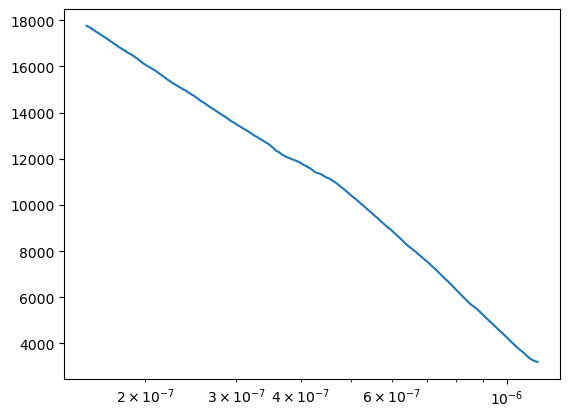

In [8]:
plt.plot(beta_m,z)
plt.gca().set_xscale('log')

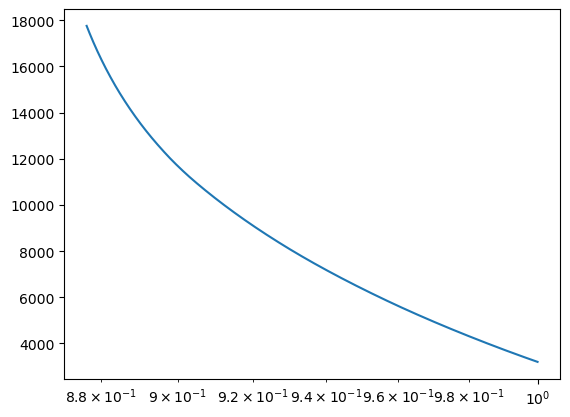

In [9]:
plt.plot(trans2,z)
plt.gca().set_xscale('log')

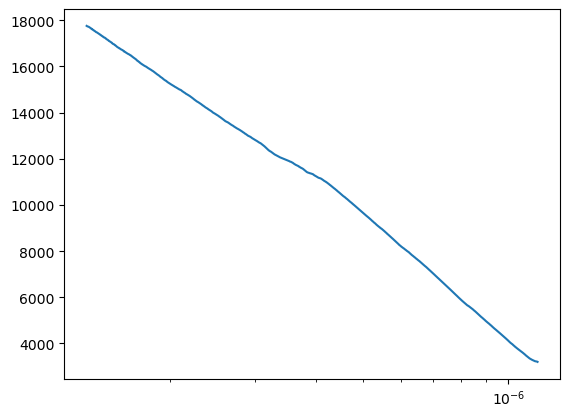

In [10]:
plt.plot(trans2*beta_m, z)
plt.gca().set_xscale('log')

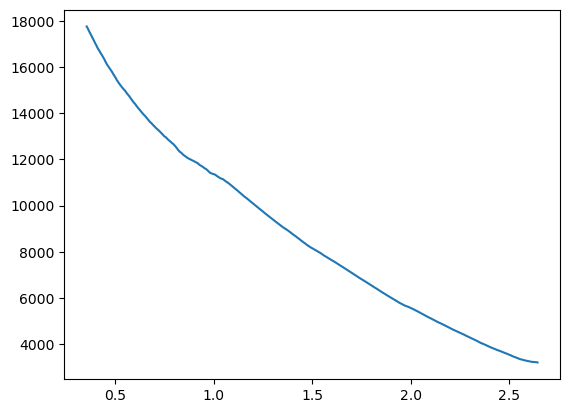

In [11]:
plt.plot(P/T, z)